# Library

In [1]:
!pip install pymysql

  Obtaining dependency information for pymysql from https://files.pythonhosted.org/packages/e5/30/20467e39523d0cfc2b6227902d3687a16364307260c75e6a1cb4422b0c62/PyMySQL-1.1.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.3 MB/s eta 0:00:00


In [2]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.express as px
import calendar

# Host

In [4]:
host = '36.93.148.91'
port = 3307
user = 'dataanalyst'
password = 'Python*123'
database = 'gis_db'

In [5]:
connection = pymysql.connect(
    host=host,
    port=port,
    user=user,
    password=password,
    database=database
)

In [6]:
cursor = connection.cursor()

# Nomor 1

In [7]:
query = '''
SELECT
    fv_articlename AS Nama_Artikel,
    fv_namacust AS Nama_Toko,
    EXTRACT(YEAR_MONTH FROM t_penjualanmst.fd_tgljual) AS Bulan_Tahun,
    SUM(t_penjualandtl_goods.fn_jualpersize) AS Total_Qty_PCS
FROM
    t_penjualanmst
JOIN
    t_penjualandtl_goods ON t_penjualanmst.fv_nopenjualan = t_penjualandtl_goods.fv_nopenjualan
WHERE
    t_penjualanmst.fd_tgljual BETWEEN '2023-01-01' AND '2023-10-31'
GROUP BY
    Nama_Artikel, Bulan_Tahun
ORDER BY
    Bulan_Tahun;
'''
cursor.execute(query)
result = cursor.fetchall()

In [8]:
df = pd.DataFrame(result)
df

,0,1,2,3
0,CHINO PANT,GALERIA BIP BANDUNG,202301,19
1,CHINO PANT REGULAR,GALERIA BIP BANDUNG,202301,3
2,5 POCKET PANT PIECE DYED REGULAR,GALERIA BIP BANDUNG,202301,2
3,CARGO SHORT REGULAR,GALERIA BIP BANDUNG,202301,2
4,5 POCKET PANT PIECE DYED,GALERIA BIP BANDUNG,202301,37
...,...,...,...,...
240,LONG SLEEVE KOKO SHIRT REGULAR,GALERIA BIP BANDUNG,202310,2
241,LONG SLEEVE SHIRT REGULAR,GALERIA BIP BANDUNG,202310,32
242,CHINO SHORT REGULAR,GALERIA BIP BANDUNG,202310,4
243,CHINO PANT,GALERIA BIP BANDUNG,202310,16


In [9]:
df = df.rename(columns={0: 'Nama_Artikel', 1: 'Nama_Toko', 2: 'Bulan_Tahun', 3: 'Total_Qty_PCS'})
df

,Nama_Artikel,Nama_Toko,Bulan_Tahun,Total_Qty_PCS
0,CHINO PANT,GALERIA BIP BANDUNG,202301,19
1,CHINO PANT REGULAR,GALERIA BIP BANDUNG,202301,3
2,5 POCKET PANT PIECE DYED REGULAR,GALERIA BIP BANDUNG,202301,2
3,CARGO SHORT REGULAR,GALERIA BIP BANDUNG,202301,2
4,5 POCKET PANT PIECE DYED,GALERIA BIP BANDUNG,202301,37
...,...,...,...,...
240,LONG SLEEVE KOKO SHIRT REGULAR,GALERIA BIP BANDUNG,202310,2
241,LONG SLEEVE SHIRT REGULAR,GALERIA BIP BANDUNG,202310,32
242,CHINO SHORT REGULAR,GALERIA BIP BANDUNG,202310,4
243,CHINO PANT,GALERIA BIP BANDUNG,202310,16


In [10]:
# Ubah tipe data 'object' ke dalam 'integer'
df['Total_Qty_PCS'] = df['Total_Qty_PCS'].astype(int)

In [11]:
# Ubah 'Bulan_Tahun' ke dalam nama bulan
df['Bulan_Tahun'] = pd.to_datetime(df['Bulan_Tahun'], format='%Y%m').dt.strftime('%B')
df

,Nama_Artikel,Nama_Toko,Bulan_Tahun,Total_Qty_PCS
0,CHINO PANT,GALERIA BIP BANDUNG,January,19
1,CHINO PANT REGULAR,GALERIA BIP BANDUNG,January,3
2,5 POCKET PANT PIECE DYED REGULAR,GALERIA BIP BANDUNG,January,2
3,CARGO SHORT REGULAR,GALERIA BIP BANDUNG,January,2
4,5 POCKET PANT PIECE DYED,GALERIA BIP BANDUNG,January,37
...,...,...,...,...
240,LONG SLEEVE KOKO SHIRT REGULAR,GALERIA BIP BANDUNG,October,2
241,LONG SLEEVE SHIRT REGULAR,GALERIA BIP BANDUNG,October,32
242,CHINO SHORT REGULAR,GALERIA BIP BANDUNG,October,4
243,CHINO PANT,GALERIA BIP BANDUNG,October,16


In [12]:
# 'custom_order' : digunakan untuk patokan mengurutkan data
custom_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['Bulan_Tahun'] = pd.Categorical(df['Bulan_Tahun'], categories=custom_order, ordered=True)
df

,Nama_Artikel,Nama_Toko,Bulan_Tahun,Total_Qty_PCS
0,CHINO PANT,GALERIA BIP BANDUNG,January,19
1,CHINO PANT REGULAR,GALERIA BIP BANDUNG,January,3
2,5 POCKET PANT PIECE DYED REGULAR,GALERIA BIP BANDUNG,January,2
3,CARGO SHORT REGULAR,GALERIA BIP BANDUNG,January,2
4,5 POCKET PANT PIECE DYED,GALERIA BIP BANDUNG,January,37
...,...,...,...,...
240,LONG SLEEVE KOKO SHIRT REGULAR,GALERIA BIP BANDUNG,October,2
241,LONG SLEEVE SHIRT REGULAR,GALERIA BIP BANDUNG,October,32
242,CHINO SHORT REGULAR,GALERIA BIP BANDUNG,October,4
243,CHINO PANT,GALERIA BIP BANDUNG,October,16


In [13]:
# Group nama toko, bulan_tahun, dan total qty pcs
grouped_data_months = df.groupby(['Nama_Toko', 'Bulan_Tahun'])['Total_Qty_PCS'].sum().unstack().fillna(0)
grouped_data_months

Bulan_Tahun,January,February,March,April,May,June,July,August,September,October,November,December
Nama_Toko,,,,,,,,,,,,
GALERIA BIP BANDUNG,169,178,399,1008,104,141,124,131,150,160,0,0


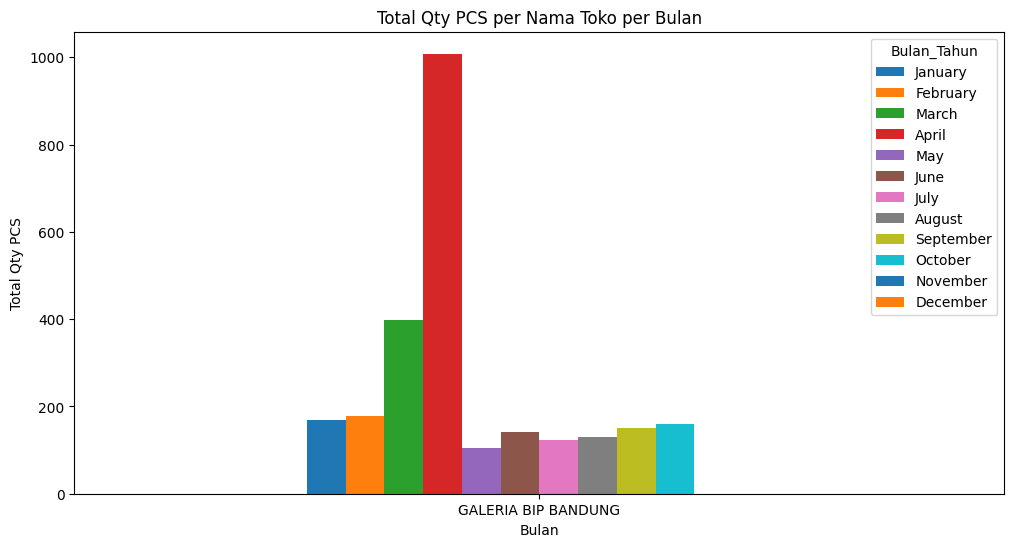

In [14]:
# Plot bar chart
ax = grouped_data_months.plot(kind='bar', figsize=(12, 6))
plt.title('Total Qty PCS per Nama Toko per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Qty PCS')
plt.xticks(rotation=0)  # Putar x-axis labels ke 0 derajat

# Tampilkan plot
plt.show()

# Nomor 2

In [15]:
query = '''
SELECT
    A.fv_articlename AS Nama_Artikel,
    P.fv_namacust AS Nama_Toko,
    -- EXTRACT(YEAR_MONTH FROM P.fd_tgljual) AS Bulan_Tahun,-- 
    DATE_FORMAT(P.fd_tgljual, '%M %Y') AS Bulan_Tahun,
    SUM(D.fn_hargabruto) AS Total_Penjualan_Per_Bulan
FROM
    t_penjualandtl_goods AS D
JOIN
    articlesize_tb AS S ON D.fv_artsizecode = S.fv_artsizecode
JOIN
    article_tb AS A ON S.fn_articleid = A.fn_articleid
JOIN
    t_penjualanmst AS P ON D.fv_nopenjualan = P.fv_nopenjualan
WHERE
    P.fd_tgljual BETWEEN '2023-01-01' AND '2023-10-31'
GROUP BY
    Nama_Artikel, Bulan_Tahun
ORDER BY
    Bulan_Tahun;
'''
cursor.execute(query)
result = cursor.fetchall()

In [16]:
df = pd.DataFrame(result)
df

,0,1,2,3
0,5 POCKET PANT DENIM SLIM,GALERIA BIP BANDUNG,April 2023,20123700.0
1,CHINO PANT REGULAR,GALERIA BIP BANDUNG,April 2023,5500000.0
2,CHINO PANT,GALERIA BIP BANDUNG,April 2023,34535000.0
3,SHORT SLEEVE POLO SHIRT REGULAR,GALERIA BIP BANDUNG,April 2023,6609400.0
4,LONG SLEEVE SHIRT,GALERIA BIP BANDUNG,April 2023,1859000.0
...,...,...,...,...
240,LONG SLEEVE SHIRT REGULAR,GALERIA BIP BANDUNG,September 2023,5092100.0
241,5 POCKET PANT DENIM SUPER SKINNY,GALERIA BIP BANDUNG,September 2023,450000.0
242,CHINO SHORT,GALERIA BIP BANDUNG,September 2023,256800.0
243,LONG SLEEVE KOKO SHIRT REGULAR,GALERIA BIP BANDUNG,September 2023,329400.0


In [17]:
df = df.rename(columns={0: 'Nama_Artikel', 1: 'Nama_Toko', 2: 'Bulan_Tahun', 3: 'Total_Penjualan_Per_Bulan'})
df

,Nama_Artikel,Nama_Toko,Bulan_Tahun,Total_Penjualan_Per_Bulan
0,5 POCKET PANT DENIM SLIM,GALERIA BIP BANDUNG,April 2023,20123700.0
1,CHINO PANT REGULAR,GALERIA BIP BANDUNG,April 2023,5500000.0
2,CHINO PANT,GALERIA BIP BANDUNG,April 2023,34535000.0
3,SHORT SLEEVE POLO SHIRT REGULAR,GALERIA BIP BANDUNG,April 2023,6609400.0
4,LONG SLEEVE SHIRT,GALERIA BIP BANDUNG,April 2023,1859000.0
...,...,...,...,...
240,LONG SLEEVE SHIRT REGULAR,GALERIA BIP BANDUNG,September 2023,5092100.0
241,5 POCKET PANT DENIM SUPER SKINNY,GALERIA BIP BANDUNG,September 2023,450000.0
242,CHINO SHORT,GALERIA BIP BANDUNG,September 2023,256800.0
243,LONG SLEEVE KOKO SHIRT REGULAR,GALERIA BIP BANDUNG,September 2023,329400.0


In [18]:
# 'custom_order' : digunakan untuk patokan mengurutkan data
custom_order = ['January 2023', 'February 2023', 'March 2023', 'April 2023', 'May 2023', 'June 2023', 'July 2023', 'August 2023', 'September 2023', 'October 2023', 'November 2023', 'December 2023']
df['Bulan_Tahun'] = pd.Categorical(df['Bulan_Tahun'], categories=custom_order, ordered=True)
df

,Nama_Artikel,Nama_Toko,Bulan_Tahun,Total_Penjualan_Per_Bulan
0,5 POCKET PANT DENIM SLIM,GALERIA BIP BANDUNG,April 2023,20123700.0
1,CHINO PANT REGULAR,GALERIA BIP BANDUNG,April 2023,5500000.0
2,CHINO PANT,GALERIA BIP BANDUNG,April 2023,34535000.0
3,SHORT SLEEVE POLO SHIRT REGULAR,GALERIA BIP BANDUNG,April 2023,6609400.0
4,LONG SLEEVE SHIRT,GALERIA BIP BANDUNG,April 2023,1859000.0
...,...,...,...,...
240,LONG SLEEVE SHIRT REGULAR,GALERIA BIP BANDUNG,September 2023,5092100.0
241,5 POCKET PANT DENIM SUPER SKINNY,GALERIA BIP BANDUNG,September 2023,450000.0
242,CHINO SHORT,GALERIA BIP BANDUNG,September 2023,256800.0
243,LONG SLEEVE KOKO SHIRT REGULAR,GALERIA BIP BANDUNG,September 2023,329400.0


In [19]:
# Group nama toko, bulan_tahun, dan total qty pcs
grouped_data_months = df.groupby(['Nama_Toko', 'Bulan_Tahun'])['Total_Penjualan_Per_Bulan'].sum().unstack().fillna(0)
grouped_data_months

Bulan_Tahun,January 2023,February 2023,March 2023,April 2023,May 2023,June 2023,July 2023,August 2023,September 2023,October 2023,November 2023,December 2023
Nama_Toko,,,,,,,,,,,,
GALERIA BIP BANDUNG,51842300.0,56435310.0,104926500.0,288772700.0,34130100.0,45879700.0,38042300.0,39472100.0,45829470.0,42879000.0,0.0,0.0


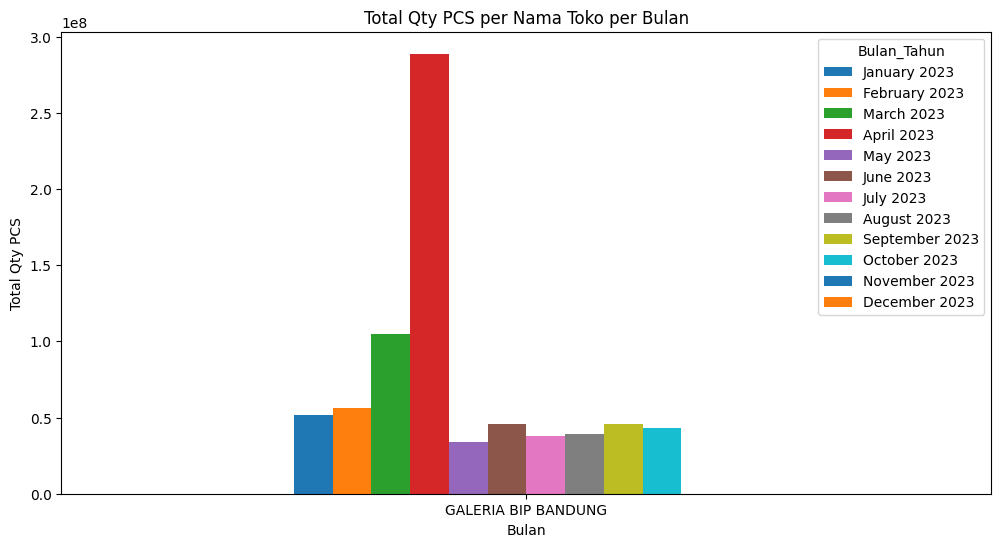

In [20]:
# Plot bar chart
ax = grouped_data_months.plot(kind='bar', figsize=(12, 6))
plt.title('Total Qty PCS per Nama Toko per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Qty PCS')
plt.xticks(rotation=0)  # Putar x-axis labels ke 0 derajat

# Tampilkan plot
plt.show()

# Nomor 3

In [21]:
query = '''
SELECT
    brand_tb.fv_brandname AS Nama_Brand,
    DATE_FORMAT(t_penjualanmst.fd_tgljual, '%b %Y') AS Bulan_Tahun,
    SUM(t_penjualandtl_goods.fn_jualpersize) AS Total_Qty_PCS_Per_Bulan
FROM
    t_penjualanmst
JOIN customer_tb ON t_penjualanmst.fn_cusid = customer_tb.fn_cusid
JOIN brand_tb ON brand_tb.fn_userinput = customer_tb.fn_userinput
JOIN t_penjualandtl_goods ON t_penjualanmst.fv_nopenjualan = t_penjualandtl_goods.fv_nopenjualan
WHERE
    t_penjualanmst.fd_tgljual BETWEEN '2023-01-01' AND '2023-10-31'
GROUP BY
    brand_tb.fv_brandname, Bulan_Tahun
ORDER BY
    brand_tb.fv_brandname, DATE_FORMAT(t_penjualanmst.fd_tgljual, '%Y-%m');
'''
cursor.execute(query)
result = cursor.fetchall()

In [22]:
df = pd.DataFrame(result)
df

,0,1,2
0,GAB'S,Jan 2023,169
1,GAB'S,Feb 2023,178
2,GAB'S,Mar 2023,399
3,GAB'S,Apr 2023,1008
4,GAB'S,May 2023,104
5,GAB'S,Jun 2023,141
6,GAB'S,Jul 2023,124
7,GAB'S,Aug 2023,131
8,GAB'S,Sep 2023,150
9,GAB'S,Oct 2023,160


In [23]:
df = df.rename(columns={0: 'Nama_Brand', 1: 'Bulan_Tahun', 2: 'Total_Qty_PCS_Per_Bulan'})
df

,Nama_Brand,Bulan_Tahun,Total_Qty_PCS_Per_Bulan
0,GAB'S,Jan 2023,169
1,GAB'S,Feb 2023,178
2,GAB'S,Mar 2023,399
3,GAB'S,Apr 2023,1008
4,GAB'S,May 2023,104
5,GAB'S,Jun 2023,141
6,GAB'S,Jul 2023,124
7,GAB'S,Aug 2023,131
8,GAB'S,Sep 2023,150
9,GAB'S,Oct 2023,160


In [24]:
df['Bulan_Tahun'] = pd.to_datetime(df['Bulan_Tahun'], format='%b %Y')
df = df.sort_values('Bulan_Tahun')

In [25]:
df.dtypes

Nama_Brand                         object
Bulan_Tahun                datetime64[ns]
Total_Qty_PCS_Per_Bulan            object
dtype: object

In [26]:
# Ubah tipe data 'object' ke dalam 'integer'
df['Total_Qty_PCS_Per_Bulan'] = df['Total_Qty_PCS_Per_Bulan'].astype(int)

In [27]:
# Melakukan pivot untuk mengubah data menjadi format yang cocok untuk stacked column plot
df = df.pivot(index='Bulan_Tahun', columns='Nama_Brand', values='Total_Qty_PCS_Per_Bulan')
df

Nama_Brand,GAB'S,GABRIELLE,GBL MATAHARI
Bulan_Tahun,,,
2023-01-01,169,169,169
2023-02-01,178,178,178
2023-03-01,399,399,399
2023-04-01,1008,1008,1008
2023-05-01,104,104,104
2023-06-01,141,141,141
2023-07-01,124,124,124
2023-08-01,131,131,131
2023-09-01,150,150,150


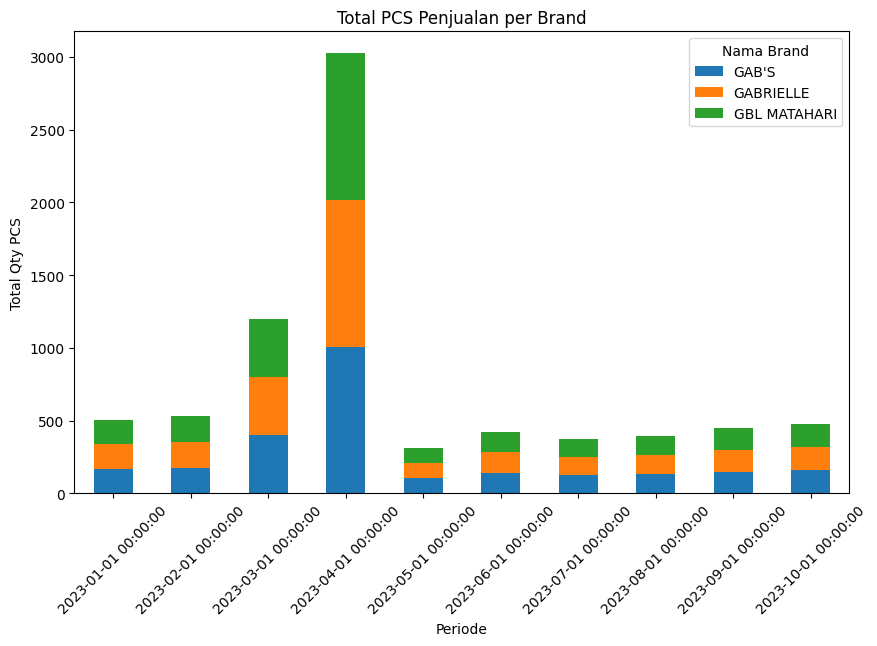

In [28]:
# Membuat stacked column plot
ax = df.plot(kind='bar', stacked=True, figsize=(10, 6))

# Menambahkan label dan judul
plt.xlabel('Periode')
plt.ylabel('Total Qty PCS')
plt.title('Total PCS Penjualan per Brand')
plt.legend(title='Nama Brand')
plt.xticks(rotation=45)
plt.show()

# Nomor 4

In [29]:
query = '''
SELECT
    brand_tb.fv_brandname AS Nama_Brand,
    DATE_FORMAT(t_penjualanmst.fd_tgljual, '%b %Y') AS Bulan_Tahun,
    SUM(t_penjualandtl_goods.fn_hargabruto) AS Total_Rp_Penjualan_Per_Bulan
FROM
    t_penjualanmst
JOIN customer_tb ON t_penjualanmst.fn_cusid = customer_tb.fn_cusid
JOIN brand_tb ON brand_tb.fn_userinput = customer_tb.fn_userinput
JOIN t_penjualandtl_goods ON t_penjualanmst.fv_nopenjualan = t_penjualandtl_goods.fv_nopenjualan
WHERE
    t_penjualanmst.fd_tgljual BETWEEN '2023-01-01' AND '2023-10-31'
GROUP BY
    brand_tb.fv_brandname, DATE_FORMAT(t_penjualanmst.fd_tgljual, '%Y-%m')
ORDER BY
    brand_tb.fv_brandname, DATE_FORMAT(t_penjualanmst.fd_tgljual, '%Y-%m');
'''
cursor.execute(query)
result = cursor.fetchall()

In [30]:
df = pd.DataFrame(result)
df

,0,1,2
0,GAB'S,Jan 2023,51842300.0
1,GAB'S,Feb 2023,56435310.0
2,GAB'S,Mar 2023,104926500.0
3,GAB'S,Apr 2023,288772700.0
4,GAB'S,May 2023,34130100.0
5,GAB'S,Jun 2023,45879700.0
6,GAB'S,Jul 2023,38042300.0
7,GAB'S,Aug 2023,39472100.0
8,GAB'S,Sep 2023,45829470.0
9,GAB'S,Oct 2023,42879000.0


In [31]:
df = df.rename(columns={0: 'Nama_Brand', 1: 'Bulan_Tahun', 2: 'Total_Rp_Penjualan_Per_Bulan'})
df

,Nama_Brand,Bulan_Tahun,Total_Rp_Penjualan_Per_Bulan
0,GAB'S,Jan 2023,51842300.0
1,GAB'S,Feb 2023,56435310.0
2,GAB'S,Mar 2023,104926500.0
3,GAB'S,Apr 2023,288772700.0
4,GAB'S,May 2023,34130100.0
5,GAB'S,Jun 2023,45879700.0
6,GAB'S,Jul 2023,38042300.0
7,GAB'S,Aug 2023,39472100.0
8,GAB'S,Sep 2023,45829470.0
9,GAB'S,Oct 2023,42879000.0


In [32]:
# Ubah tipe data 'object' ke dalam 'integer'
df['Total_Qty_PCS_Per_Bulan'] = df['Total_Rp_Penjualan_Per_Bulan'].astype(int)

In [33]:
fig = px.line(df, x='Bulan_Tahun', y='Total_Rp_Penjualan_Per_Bulan', color='Nama_Brand', title='Tren Penjualan Per Bulan')
fig.update_xaxes(title_text='Periode')
fig.update_yaxes(title_text='Total Penjualan Per Bulan')
fig.show()

# Nomor 5

In [34]:
query = '''
SELECT
    C.fv_colorname AS Nama_Color,
    MONTH(P.fd_tgljual) AS Bulan,
    SUM(D.fn_jualpersize) AS Total_Qty_PCS
FROM
    t_penjualanmst P
JOIN
    t_penjualandtl_goods D ON P.fv_nopenjualan = D.fv_nopenjualan
JOIN
    article_tb A ON A.fv_articlecode = D.fv_articlecode
JOIN
    color_tb C ON A.fn_colorid = C.fn_colorid
WHERE
    P.fd_tgljual BETWEEN '2023-01-01' AND '2023-10-31'
GROUP BY
    C.fv_colorname, Bulan
ORDER BY
    C.fv_colorname, Bulan;

'''
cursor.execute(query)
result = cursor.fetchall()

In [35]:
df = pd.DataFrame(result)
df

,0,1,2
0,BASIC DARK STONE WASH,1,2
1,BASIC MEDIUM STONE WASH,1,1
2,BASIC MEDIUM STONE WASH,2,1
3,BASIC MEDIUM STONE WASH,3,1
4,BASIC MEDIUM STONE WASH,4,1
...,...,...,...
177,YELLOW,6,1
178,YELLOW,7,1
179,YELLOW,8,2
180,YELLOW,9,3


In [36]:
df = df.rename(columns={0: 'Nama_Color', 1: 'Bulan', 2: 'Total_Qty_PCS'})
df

,Nama_Color,Bulan,Total_Qty_PCS
0,BASIC DARK STONE WASH,1,2
1,BASIC MEDIUM STONE WASH,1,1
2,BASIC MEDIUM STONE WASH,2,1
3,BASIC MEDIUM STONE WASH,3,1
4,BASIC MEDIUM STONE WASH,4,1
...,...,...,...
177,YELLOW,6,1
178,YELLOW,7,1
179,YELLOW,8,2
180,YELLOW,9,3


In [37]:
fig = px.bar(df, 
             x='Total_Qty_PCS',
             y='Bulan',
             color='Nama_Color',
             orientation='h',
             title='Tren Penjualan Per Bulan',
             labels={'Total_Qty_PCS': 'Total Penjualan Per Bulan', 'Bulan': 'Periode'},
             )
fig.show()

# Nomor 6

In [38]:
query = '''
SELECT
    C.fv_colorname AS Nama_Color,
    MONTH(P.fd_tgljual) AS Bulan,
    SUM(D.fn_jualpersize * D.fn_hargabruto) AS Total_Rp_Penjualan
FROM
    t_penjualanmst P
JOIN
    t_penjualandtl_goods D ON P.fv_nopenjualan = D.fv_nopenjualan
JOIN
    article_tb A ON A.fv_articlecode = D.fv_articlecode
JOIN
    color_tb C ON A.fn_colorid = C.fn_colorid
WHERE
    P.fd_tgljual BETWEEN '2023-01-01' AND '2023-10-31'
GROUP BY
    C.fv_colorname, Bulan
ORDER BY
    C.fv_colorname, Bulan;
'''
cursor.execute(query)
result = cursor.fetchall()

In [39]:
df = pd.DataFrame(result)
df

,0,1,2
0,BASIC DARK STONE WASH,1,770000.0
1,BASIC MEDIUM STONE WASH,1,249000.0
2,BASIC MEDIUM STONE WASH,2,271600.0
3,BASIC MEDIUM STONE WASH,3,199000.0
4,BASIC MEDIUM STONE WASH,4,232800.0
...,...,...,...
177,YELLOW,6,308000.0
178,YELLOW,7,264000.0
179,YELLOW,8,564300.0
180,YELLOW,9,582770.0


In [40]:
df = df.rename(columns={0: 'Nama_Color', 1: 'Bulan', 2: 'Total_Rp_Penjualan'})
df

,Nama_Color,Bulan,Total_Rp_Penjualan
0,BASIC DARK STONE WASH,1,770000.0
1,BASIC MEDIUM STONE WASH,1,249000.0
2,BASIC MEDIUM STONE WASH,2,271600.0
3,BASIC MEDIUM STONE WASH,3,199000.0
4,BASIC MEDIUM STONE WASH,4,232800.0
...,...,...,...
177,YELLOW,6,308000.0
178,YELLOW,7,264000.0
179,YELLOW,8,564300.0
180,YELLOW,9,582770.0


In [41]:
fig = px.bar(df, 
             x='Total_Rp_Penjualan',
             y='Bulan',
             color='Nama_Color',
             orientation='h',
             title='Tren Penjualan Per Bulan',
             labels={'Total_Qty_PCS': 'Total Penjualan Per Bulan', 'Bulan': 'Periode'},
             )
fig.show()

# Nomor 7

In [42]:
query = '''
SELECT
    D.fv_divname AS Nama_Divisi,
    MONTH(P.fd_tgljual) AS Bulan,
    SUM(G.fn_jualpersize) AS Total_Qty_PCS_Per_Bulan
FROM
    t_penjualanmst P
JOIN
    division_tb D ON P.fn_divid = D.fn_divid
JOIN
    t_penjualandtl_goods G ON P.fv_nopenjualan = G.fv_nopenjualan
WHERE
    P.fd_tgljual BETWEEN '2023-01-01' AND '2023-10-31'
GROUP BY
    D.fv_divname, Bulan
ORDER BY
    D.fv_divname, Bulan;
'''
cursor.execute(query)
result = cursor.fetchall()

In [43]:
df = pd.DataFrame(result)
df

,0,1,2
0,CASUAL / MAN,1,112
1,CASUAL / MAN,2,86
2,CASUAL / MAN,3,183
3,CASUAL / MAN,4,574
4,CASUAL / MAN,5,52
5,CASUAL / MAN,6,73
6,CASUAL / MAN,7,64
7,CASUAL / MAN,8,47
8,CASUAL / MAN,9,75
9,CASUAL / MAN,10,77


In [44]:
df = df.rename(columns={0: 'Nama_Divisi', 1: 'Bulan', 2: 'Total_Qty_PCS_Per_Bulan'})
df

,Nama_Divisi,Bulan,Total_Qty_PCS_Per_Bulan
0,CASUAL / MAN,1,112
1,CASUAL / MAN,2,86
2,CASUAL / MAN,3,183
3,CASUAL / MAN,4,574
4,CASUAL / MAN,5,52
5,CASUAL / MAN,6,73
6,CASUAL / MAN,7,64
7,CASUAL / MAN,8,47
8,CASUAL / MAN,9,75
9,CASUAL / MAN,10,77


In [45]:
fig = px.line(df, x='Bulan', y='Total_Qty_PCS_Per_Bulan', color='Nama_Divisi', title='Tren Penjualan Per Bulan')
fig.update_xaxes(title_text='Bulan')
fig.update_yaxes(title_text='Total Penjualan Per Bulan')
fig.show()

# Nomor 8

In [46]:
query = '''
SELECT
    D.fv_divname AS Nama_Divisi,
    MONTH(P.fd_tgljual) AS Bulan,
    SUM(P.fn_totalhargabruto) AS Total_Rp_Penjualan
FROM
    t_penjualanmst P
JOIN
    division_tb D ON P.fn_divid = D.fn_divid
WHERE
    P.fd_tgljual BETWEEN '2023-01-01' AND '2023-10-31'
GROUP BY
    D.fv_divname, Bulan
ORDER BY
    D.fv_divname, Bulan;
'''
cursor.execute(query)
result = cursor.fetchall()

In [47]:
df = pd.DataFrame(result)
df

,0,1,2
0,CASUAL / MAN,1,45753500.0
1,CASUAL / MAN,2,35581000.0
2,CASUAL / MAN,3,62292000.0
3,CASUAL / MAN,4,209617000.0
4,CASUAL / MAN,5,21587000.0
5,CASUAL / MAN,6,29223000.0
6,CASUAL / MAN,7,23530000.0
7,CASUAL / MAN,8,17838000.0
8,CASUAL / MAN,9,30875000.0
9,CASUAL / MAN,10,32055500.0


In [48]:
df = df.rename(columns={0: 'Nama_Divisi', 1: 'Bulan', 2: 'Total_Rp_Penjualan'})
df

,Nama_Divisi,Bulan,Total_Rp_Penjualan
0,CASUAL / MAN,1,45753500.0
1,CASUAL / MAN,2,35581000.0
2,CASUAL / MAN,3,62292000.0
3,CASUAL / MAN,4,209617000.0
4,CASUAL / MAN,5,21587000.0
5,CASUAL / MAN,6,29223000.0
6,CASUAL / MAN,7,23530000.0
7,CASUAL / MAN,8,17838000.0
8,CASUAL / MAN,9,30875000.0
9,CASUAL / MAN,10,32055500.0


In [49]:
fig = px.line(df, x='Bulan', y='Total_Rp_Penjualan', color='Nama_Divisi', title='Tren Penjualan Per Bulan')
fig.update_xaxes(title_text='Bulan')
fig.update_yaxes(title_text='Total Penjualan Per Bulan')
fig.show()

# Nomor 9

In [50]:
query = '''
SELECT
    F.fv_fitname AS Nama_Fitting,
    MONTH(P.fd_tgljual) AS Bulan,
    SUM(G.fn_jualpersize) AS Total_Qty_PCS_Per_Bulan
FROM
    t_penjualanmst P
JOIN
    t_penjualandtl_goods G ON P.fv_nopenjualan = G.fv_nopenjualan
JOIN
    article_tb A ON G.fv_articlecode = A.fv_articlecode
JOIN
    fitting_tb F ON A.fn_fitid = F.fn_fitid
WHERE
    P.fd_tgljual BETWEEN '2023-01-01' AND '2023-10-31'
GROUP BY
    Nama_Fitting, Bulan
ORDER BY
    Nama_Fitting, Bulan;
'''
cursor.execute(query)
result = cursor.fetchall()

In [51]:
df = pd.DataFrame(result)
df

,0,1,2
0,BOOTCUT,1,1
1,BOOTCUT,2,7
2,BOOTCUT,3,20
3,BOOTCUT,4,19
4,BOOTCUT,5,2
5,COMFORT,3,1
6,COMFORT,4,1
7,COMFORT,7,1
8,REGULAR,1,136
9,REGULAR,2,142


In [52]:
df = df.rename(columns={0: 'Nama_Fitting', 1: 'Bulan', 2: 'Total_Qty_PCS_Per_Bulan'})
df

,Nama_Fitting,Bulan,Total_Qty_PCS_Per_Bulan
0,BOOTCUT,1,1
1,BOOTCUT,2,7
2,BOOTCUT,3,20
3,BOOTCUT,4,19
4,BOOTCUT,5,2
5,COMFORT,3,1
6,COMFORT,4,1
7,COMFORT,7,1
8,REGULAR,1,136
9,REGULAR,2,142


In [53]:
fig = px.line(df, x='Bulan', y='Total_Qty_PCS_Per_Bulan', color='Nama_Fitting', title='Tren Penjualan Per Bulan')
fig.update_xaxes(title_text='Bulan')
fig.update_yaxes(title_text='Total Penjualan Per Bulan')
fig.show()

# Nomor 10

In [54]:
query = '''
SELECT
    F.fv_fitname AS Nama_Fitting,
    MONTH(P.fd_tgljual) AS Bulan,
    SUM(G.fn_hargabruto) AS Total_Rp_Penjualan
FROM
    t_penjualanmst P
JOIN
    t_penjualandtl_goods G ON P.fv_nopenjualan = G.fv_nopenjualan
JOIN
    article_tb A ON G.fv_articlecode = A.fv_articlecode
JOIN
    fitting_tb F ON A.fn_fitid = F.fn_fitid
WHERE
    P.fd_tgljual BETWEEN '2023-01-01' AND '2023-10-31'
GROUP BY
    Nama_Fitting, Bulan
ORDER BY
    Nama_Fitting, Bulan;
'''
cursor.execute(query)
result = cursor.fetchall()

In [55]:
df = pd.DataFrame(result)
df

,0,1,2
0,BOOTCUT,1,249000.0
1,BOOTCUT,2,1743000.0
2,BOOTCUT,3,4031800.0
3,BOOTCUT,4,3832800.0
4,BOOTCUT,5,398000.0
5,COMFORT,3,271600.0
6,COMFORT,4,271600.0
7,COMFORT,7,199000.0
8,REGULAR,1,40818900.0
9,REGULAR,2,42559910.0


In [56]:
df = df.rename(columns={0: 'Nama_Fitting', 1: 'Bulan', 2: 'Total_Rp_Penjualan'})
df

,Nama_Fitting,Bulan,Total_Rp_Penjualan
0,BOOTCUT,1,249000.0
1,BOOTCUT,2,1743000.0
2,BOOTCUT,3,4031800.0
3,BOOTCUT,4,3832800.0
4,BOOTCUT,5,398000.0
5,COMFORT,3,271600.0
6,COMFORT,4,271600.0
7,COMFORT,7,199000.0
8,REGULAR,1,40818900.0
9,REGULAR,2,42559910.0


In [57]:
fig = px.line(df, x='Bulan', y='Total_Rp_Penjualan', color='Nama_Fitting', title='Tren Penjualan Per Bulan')
fig.update_xaxes(title_text='Bulan')
fig.update_yaxes(title_text='Total Penjualan Per Bulan')
fig.show()

# Nomor 11

In [58]:
query = '''
SELECT
    mt.fv_namemark AS 'Nama Mark',
    MONTH(mst.fd_tgljual) AS 'Bulan',
    SUM(dt.fn_jualpersize) AS 'Total Qty PCS'
FROM
    t_penjualanmst mst
JOIN
    t_penjualandtl_goods dt ON mst.fv_nopenjualan = dt.fv_nopenjualan
JOIN
    markdown_tb mt ON dt.fn_markid = mt.fn_markid
GROUP BY
    mt.fv_namemark, MONTH(mst.fd_tgljual)
ORDER BY
    mt.fv_namemark, MONTH(mst.fd_tgljual);
'''
cursor.execute(query)
result = cursor.fetchall()

In [59]:
df = pd.DataFrame(result)
df

,0,1,2
0,DISC 37%,9,1
1,DISC 50%,1,8
2,DISC 50%,2,1
3,DISC 50%,3,1
4,DISC 50%,4,1
5,DISC 50%,5,2
6,DISC 50%,6,1
7,DISC 50%,9,1
8,DISC 50%,10,3
9,NORMAL,1,115


In [60]:
df = df.rename(columns={0: 'Nama Mark', 1: 'Bulan', 2: 'Total Qty PCS'})
df

,Nama Mark,Bulan,Total Qty PCS
0,DISC 37%,9,1
1,DISC 50%,1,8
2,DISC 50%,2,1
3,DISC 50%,3,1
4,DISC 50%,4,1
5,DISC 50%,5,2
6,DISC 50%,6,1
7,DISC 50%,9,1
8,DISC 50%,10,3
9,NORMAL,1,115


In [61]:
fig = px.line(df, x='Bulan', y='Total Qty PCS', color='Nama Mark', title='Tren Penjualan Per Bulan')
fig.update_xaxes(title_text='Bulan')
fig.update_yaxes(title_text='Total Penjualan Per Bulan')
fig.show()

# Nomor 12

In [62]:
query = '''
SELECT
    mt.fv_namemark AS 'Nama Mark',
    MONTH(mst.fd_tgljual) AS 'Bulan',
    SUM(dt.fn_jualpersize * dt.fn_hargabruto) AS 'Total_Rp_Penjualan'
FROM
    t_penjualanmst mst
JOIN
    t_penjualandtl_goods dt ON mst.fv_nopenjualan = dt.fv_nopenjualan
JOIN
    markdown_tb mt ON dt.fn_markid = mt.fn_markid
GROUP BY
    mt.fv_namemark, MONTH(mst.fd_tgljual)
ORDER BY
    mt.fv_namemark, MONTH(mst.fd_tgljual);
'''
cursor.execute(query)
result = cursor.fetchall()

In [63]:
df = pd.DataFrame(result)
df

,0,1,2
0,DISC 37%,9,121370.0
1,DISC 50%,1,1437500.0
2,DISC 50%,2,470000.0
3,DISC 50%,3,214500.0
4,DISC 50%,4,235000.0
5,DISC 50%,5,450000.0
6,DISC 50%,6,235000.0
7,DISC 50%,9,249500.0
8,DISC 50%,10,713500.0
9,NORMAL,1,39649400.0


In [64]:
df = df.rename(columns={0: 'Nama Mark', 1: 'Bulan', 2: 'Total_Rp_Penjualan'})
df

,Nama Mark,Bulan,Total_Rp_Penjualan
0,DISC 37%,9,121370.0
1,DISC 50%,1,1437500.0
2,DISC 50%,2,470000.0
3,DISC 50%,3,214500.0
4,DISC 50%,4,235000.0
5,DISC 50%,5,450000.0
6,DISC 50%,6,235000.0
7,DISC 50%,9,249500.0
8,DISC 50%,10,713500.0
9,NORMAL,1,39649400.0


In [65]:
fig = px.line(df, x='Bulan', y='Total_Rp_Penjualan', color='Nama Mark', title='Tren Penjualan Per Bulan')
fig.update_xaxes(title_text='Bulan')
fig.update_yaxes(title_text='Total Penjualan Per Bulan')
fig.show()

# Nomor 13

In [66]:
query = '''
SELECT
    fv_articlename AS Nama_Artikel,
    fv_namacust AS Nama_Toko,
    EXTRACT(YEAR_MONTH FROM t_penjualanmst.fd_tgljual) AS Bulan_Tahun,
    SUM(t_penjualandtl_goods.fn_jualpersize) AS Total_Qty_PCS
FROM
    t_penjualanmst
JOIN
    t_penjualandtl_goods ON t_penjualanmst.fv_nopenjualan = t_penjualandtl_goods.fv_nopenjualan
WHERE
    t_penjualanmst.fd_tgljual BETWEEN '2023-01-01' AND '2023-10-31'
GROUP BY
    Nama_Artikel, Bulan_Tahun
ORDER BY
    Bulan_Tahun;
'''
cursor.execute(query)
result = cursor.fetchall()

In [67]:
df = pd.DataFrame(result)
df

,0,1,2,3
0,CHINO PANT,GALERIA BIP BANDUNG,202301,19
1,CHINO PANT REGULAR,GALERIA BIP BANDUNG,202301,3
2,5 POCKET PANT PIECE DYED REGULAR,GALERIA BIP BANDUNG,202301,2
3,CARGO SHORT REGULAR,GALERIA BIP BANDUNG,202301,2
4,5 POCKET PANT PIECE DYED,GALERIA BIP BANDUNG,202301,37
...,...,...,...,...
240,LONG SLEEVE KOKO SHIRT REGULAR,GALERIA BIP BANDUNG,202310,2
241,LONG SLEEVE SHIRT REGULAR,GALERIA BIP BANDUNG,202310,32
242,CHINO SHORT REGULAR,GALERIA BIP BANDUNG,202310,4
243,CHINO PANT,GALERIA BIP BANDUNG,202310,16


In [68]:
df = df.rename(columns={0: 'Nama_Artikel', 1: 'Nama_Toko', 2: 'Bulan_Tahun', 3: 'Total_Qty_PCS'})
df

,Nama_Artikel,Nama_Toko,Bulan_Tahun,Total_Qty_PCS
0,CHINO PANT,GALERIA BIP BANDUNG,202301,19
1,CHINO PANT REGULAR,GALERIA BIP BANDUNG,202301,3
2,5 POCKET PANT PIECE DYED REGULAR,GALERIA BIP BANDUNG,202301,2
3,CARGO SHORT REGULAR,GALERIA BIP BANDUNG,202301,2
4,5 POCKET PANT PIECE DYED,GALERIA BIP BANDUNG,202301,37
...,...,...,...,...
240,LONG SLEEVE KOKO SHIRT REGULAR,GALERIA BIP BANDUNG,202310,2
241,LONG SLEEVE SHIRT REGULAR,GALERIA BIP BANDUNG,202310,32
242,CHINO SHORT REGULAR,GALERIA BIP BANDUNG,202310,4
243,CHINO PANT,GALERIA BIP BANDUNG,202310,16


In [69]:
# Mengkategorikan sebagai 'Atasan' atau 'Bawahan'
df['Category'] = df['Nama_Artikel'].apply(lambda x: 'Atasan' if 'SHIRT' in x or 'JACKET' in x or 'POLO' in x or 'KOKO' in x or 'SWEAT' in x else 'Bawahan')
df = df.sort_values(by='Category')
df

,Nama_Artikel,Nama_Toko,Bulan_Tahun,Total_Qty_PCS,Category
244,LONG SLEEVE POLO SHIRT REGULAR,GALERIA BIP BANDUNG,202310,1,Atasan
110,HENLEY SHIRT REGULAR,GALERIA BIP BANDUNG,202305,1,Atasan
109,TRUCKER JACKET REGULAR,GALERIA BIP BANDUNG,202304,7,Atasan
108,SHORT SLEEVE T-SHIRT (CREW NECK) REGULAR,GALERIA BIP BANDUNG,202304,2,Atasan
107,SHORT SLEEVE POLO SHIRT REGULAR,GALERIA BIP BANDUNG,202304,30,Atasan
...,...,...,...,...,...
111,CHINO PANT REGULAR,GALERIA BIP BANDUNG,202305,6,Bawahan
112,5 POCKET PANT DENIM SKINNY,GALERIA BIP BANDUNG,202305,2,Bawahan
116,CHINO PANT,GALERIA BIP BANDUNG,202305,6,Bawahan
97,CHINO PANT SLIM,GALERIA BIP BANDUNG,202304,30,Bawahan


In [70]:
df['Total_Qty_PCS'] = df['Total_Qty_PCS'].astype(int)

In [71]:
df = df.groupby('Category')['Total_Qty_PCS'].sum().reset_index()
df = df.sort_values(by='Category')
df

,Category,Total_Qty_PCS
0,Atasan,996
1,Bawahan,1568


In [72]:
fig = px.pie(df, values='Total_Qty_PCS', names='Category', title='Total Qty PCS per Category')
fig.show()

# Tutup Koneksi

In [73]:
# connection.close()